In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from KeemPlot import KeemPlot as kp

In [11]:
df = pd.read_pickle("/Volumes/onishlab_shared/PROJECTS/30_Andrew/03_IMAGING_DATABASE/IMDB.pkl")
data = df.loc[:, ["feed", "array_vals"]].values

In [22]:
J = data[data[:, 0] == "JUB66_RFP"][:,1]
CB = data[data[:, 0] == "JUB66_RFP_IN_CEMBIO"][:,1]
NC = data[data[:, 0] == "MK_JUB66_RFP_IN_JUB66"][:,1]

In [26]:
J = np.stack(J)
CB = np.stack(CB)
NC = np.stack(NC)

In [27]:
J.shape, CB.shape, NC.shape

((30, 3500), (30, 3500), (30, 3500))

In [36]:
groups = [J, CB, NC]

In [56]:
avgs = []
J_codes   =  [kp.create_barcode(kp, j) for j in groups[0]]
CB_codes  =  [kp.create_barcode(kp, cb) for cb in groups[1]]
NC_codes  =  [kp.create_barcode(kp, nc) for nc in groups[2]]

for g in groups:

    avgs.append(kp.create_barcode(kp, np.sum(g, axis=0) / np.sqrt(g.shape[0]) * 1.5))

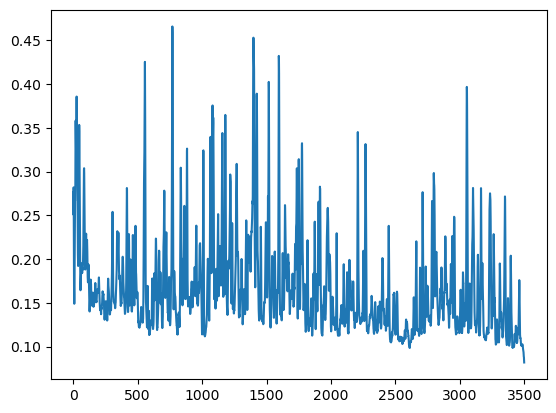

In [90]:
plt.plot(avgs[1][0,:])

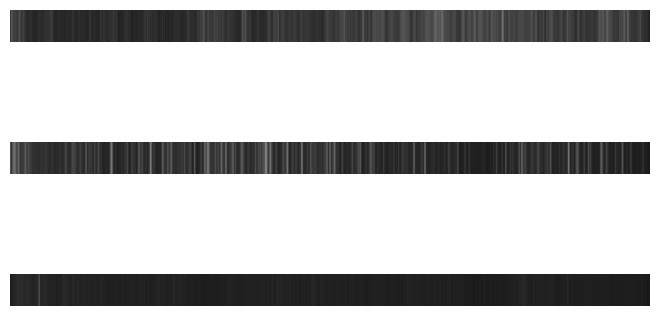

In [53]:
kp.plot_barcodes(kp, avgs, save="./figs/avgs.svg")

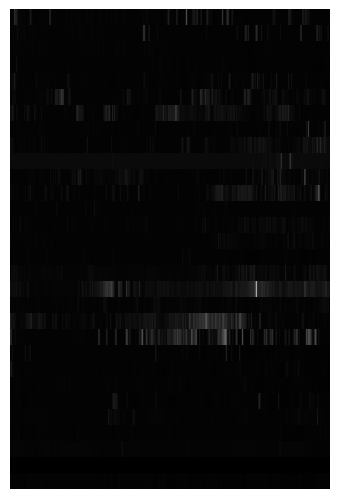

In [61]:
kp.plot_barcodes(kp, J_codes, save="./figs/J_codes.png")

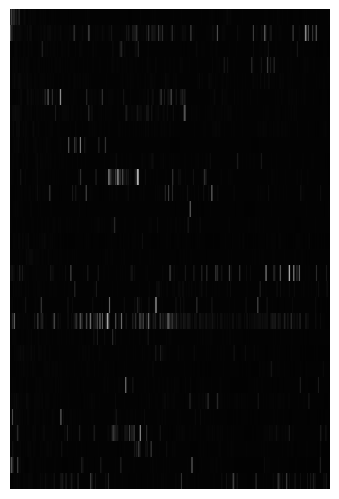

In [62]:
kp.plot_barcodes(kp, CB_codes, save = "./figs/CB_codes.png")

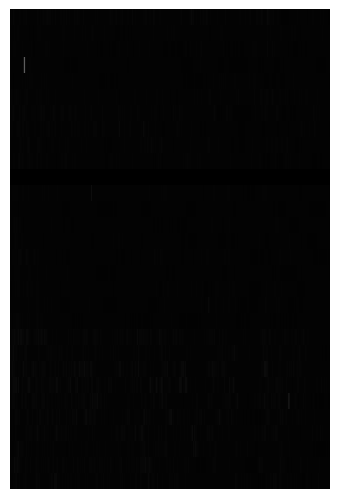

In [63]:
kp.plot_barcodes(kp, NC_codes, save = "./figs/NC_codes.png")

In [139]:
def create_boxplot(arr, sections, save=None):
    arrs = np.split(arr, sections, axis=1)
    print(arrs[0].shape)


    fig, axs = plt.subplots(1, sections, figsize=(15, 5), sharex=True, sharey=True)
    for i, ax in enumerate(axs):
        ax.boxplot(np.sum(arrs[i], axis=1))
        ax.set_ylim([0,60])
        ax.set_xticks([])
        ax.set_xlabel(i+1)

    fig.supylabel("Total Intensity")
    fig.tight_layout()

    fig.savefig(save, dpi=300)
        

In [143]:
create_boxplot(J, 3)

ValueError: array split does not result in an equal division

(30, 350)


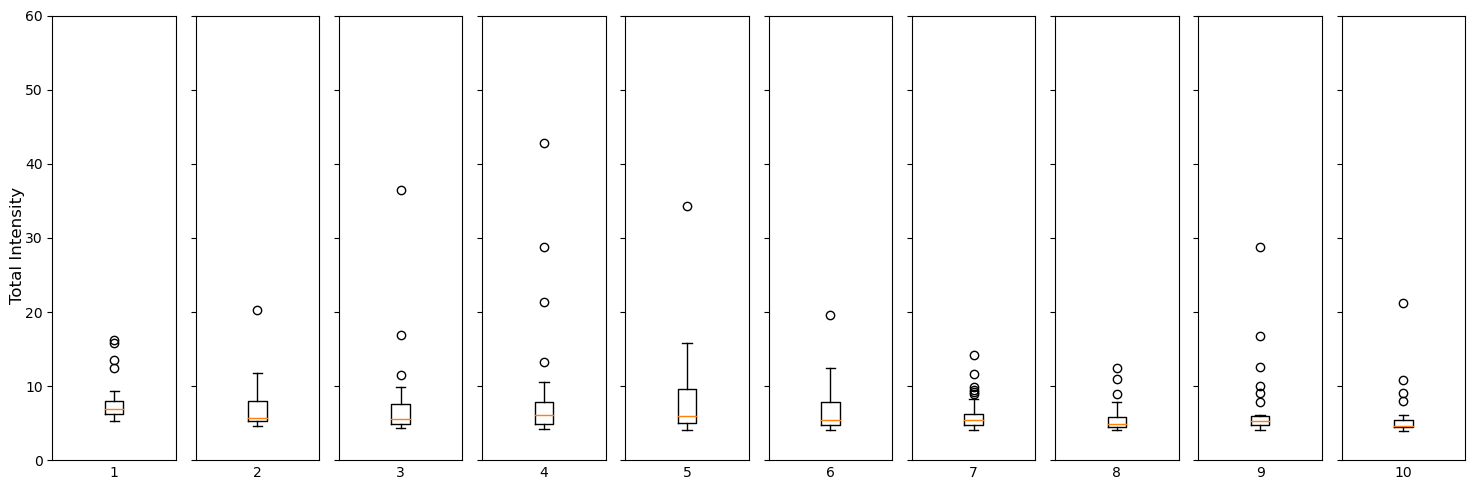

In [141]:
create_boxplot(CB, 10, save="./figs/CB_boxplot.png")

(30, 350)


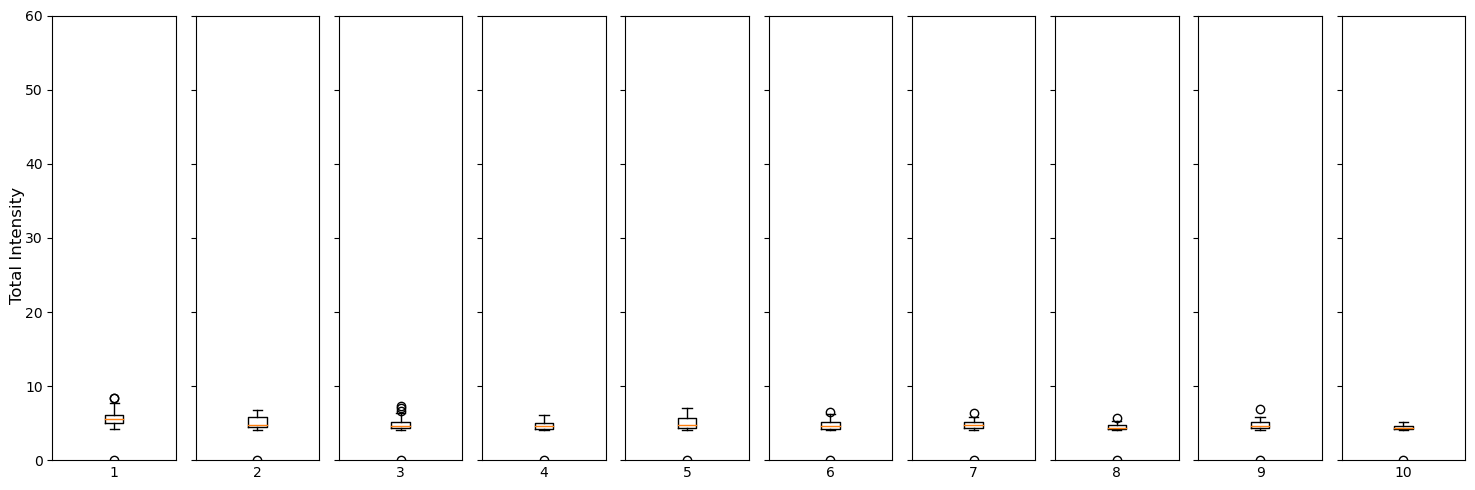

In [142]:
create_boxplot(NC, 10, save="./figs/NC_boxplot.png")